## PROJECT: PREDICT IF THE PERSON LIKELY TO HAVE HEART DISEASE OR NOT 

### Problem Type: Classification
### Domain: Health Care
### Problem Statement
A healthcare organization together with a couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This study is useful in early identification of disease and have medical intervention if necessary. This would help not only in improving the health conditions but also the economy as it has been identified that health performance and economic performance are interlinked. Given the data, we need to develop appropriate models to identify/predict if the person likely to have heart disease or not. 


In [1]:
# Import libraries for data preprocessing

library(dplyr)
library(DMwR)
library(caret)
library(ROCR) 
library(caret)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: ggplot2



In [2]:
# Import data set

data = read.csv('MEM_HeartData.csv', sep = ',' ,na.strings = c('-99', NA),strip.white = TRUE ) 

In [3]:
dim(data)

head(data , n = 3)
tail(data, n = 3)

[1] 34292    25

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,⋯,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,3265646,10,3,8,0,0,3,12,21,3,⋯,0,0.98,0.98,0,0,0,1,17.07850,0,0
2,1784378,8,0,12,0,0,0,0,0,0,⋯,0,0.74,0.74,0,0,0,1,17.05124,0,0
3,1533473,87,2,17,0,0,0,0,29,4,⋯,0,0.26,0.34,0,0,0,1,17.08810,0,0


,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,⋯,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
34290,1163963,0,0,8,0,0,7,14,14,1,⋯,0,1.00,0.99,0,0,0,1,17.05127,0,1
34291,2131919,88,2,4,0,0,0,0,0,5,⋯,0,0.22,0.14,1,0,0,1,17.00416,0,1
34292,1554343,5,0,2,0,0,0,0,144,0,⋯,0,0.85,0.74,0,0,0,1,17.05483,0,1


In [4]:
str(data)

'data.frame':	34292 obs. of  25 variables:
 $ ID    : int  3265646 1784378 1533473 2175794 2268595 1321868 2966418 1714458 1595109 2005966 ...
 $ IV    : int  10 8 87 14 20 1 3 2 14 41 ...
 $ A1    : int  3 0 2 0 2 0 6 1 0 0 ...
 $ A2    : int  8 12 17 2 8 8 8 8 2 9 ...
 $ A3    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ A4    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ A5    : int  3 0 0 0 0 0 6 0 0 0 ...
 $ A6    : int  12 0 0 0 0 1 10 0 0 0 ...
 $ A7    : int  21 0 29 0 0 1 15 0 0 0 ...
 $ A8    : int  3 0 4 2 0 0 1 0 0 0 ...
 $ A9    : int  13 0 8 5 2 0 6 0 0 0 ...
 $ A10   : int  20 0 35 6 3 1 9 0 0 0 ...
 $ A11   : int  27 27 27 27 27 27 27 27 27 27 ...
 $ A12   : int  33 0 58 6 6 1 9 0 0 0 ...
 $ A13   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ A14   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ A15   : num  0.98 0.74 0.26 0.99 0.28 1 0.79 1 0.77 0.87 ...
 $ A16   : num  0.98 0.74 0.34 0.98 0.37 0.98 0.66 1 0.81 0.72 ...
 $ A17   : int  0 0 0 1 0 0 0 0 1 0 ...
 $ A18   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ A19   : int  0 

In [5]:
summary(data)

       ID                IV               A1                 A2        
 Min.   :1058628   Min.   :-35.00   Min.   :  0.0000   Min.   : 0.000  
 1st Qu.:1459611   1st Qu.:  1.00   1st Qu.:  0.0000   1st Qu.: 2.000  
 Median :1833131   Median :  4.00   Median :  0.0000   Median : 8.000  
 Mean   :1971469   Mean   : 10.89   Mean   :  0.8148   Mean   : 6.737  
 3rd Qu.:2246610   3rd Qu.: 12.00   3rd Qu.:  1.0000   3rd Qu.: 8.000  
 Max.   :3274754   Max.   :265.00   Max.   :151.0000   Max.   :17.000  
                                                       NA's   :1672    
       A3                 A4                A5                  A6          
 Min.   :   0.000   Min.   :  0.000   Min.   :     0.00   Min.   :     0.0  
 1st Qu.:   0.000   1st Qu.:  0.000   1st Qu.:     0.00   1st Qu.:     0.0  
 Median :   0.000   Median :  0.000   Median :     0.00   Median :     0.0  
 Mean   :   0.668   Mean   :  0.148   Mean   :    24.73   Mean   :    36.4  
 3rd Qu.:   0.000   3rd Qu.:  0.000   3

In [6]:
sum(is.na(data))     # total count of na values

[1] 5648

In [7]:
col_na_values <- sapply(data, function(y) sum(is.na(y)))          # individual column-wise NA values
col_na_values

ID     IV     A1     A2     A3     A4     A5     A6     A7     A8     A9 
     0      0      0   1672      0      0      0      0      0      0      0 
   A10    A11    A12    A13    A14    A15    A16    A17    A18    A19    A20 
     0      0      0      0      0   2042   1934      0      0      0      0 
   A21    A22 Target 
     0      0      0

In [8]:
# Lets impute the NA values
data = centralImputation(data)

# if any na values
sum(is.na(data))

[1] 0

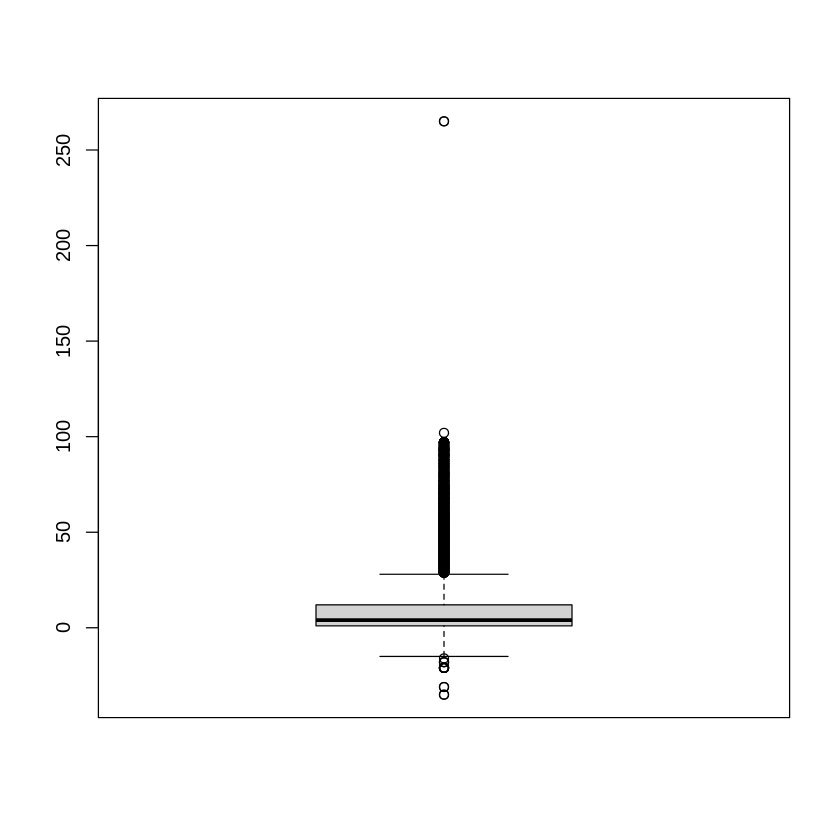

In [9]:
boxplot(data$IV)

In [10]:
# Trail and Error

# data$IV=replace(data$IV,data$IV<(quantile(data$IV, probs = 0.25)-1.5*IQR(data$IV)),quantile(data$IV, probs = 0.25))
# data$IV=replace(data$IV,data$IV>(quantile(data$IV, probs = 0.75)+1.5*IQR(data$IV)),quantile(data$IV, probs = 0.75))
# # boxplot(data$IV)

In [11]:
summary(data)

       ID                IV               A1                 A2        
 Min.   :1058628   Min.   :-35.00   Min.   :  0.0000   Min.   : 0.000  
 1st Qu.:1459611   1st Qu.:  1.00   1st Qu.:  0.0000   1st Qu.: 2.000  
 Median :1833131   Median :  4.00   Median :  0.0000   Median : 8.000  
 Mean   :1971469   Mean   : 10.89   Mean   :  0.8148   Mean   : 6.799  
 3rd Qu.:2246610   3rd Qu.: 12.00   3rd Qu.:  1.0000   3rd Qu.: 8.000  
 Max.   :3274754   Max.   :265.00   Max.   :151.0000   Max.   :17.000  
       A3                 A4                A5                  A6          
 Min.   :   0.000   Min.   :  0.000   Min.   :     0.00   Min.   :     0.0  
 1st Qu.:   0.000   1st Qu.:  0.000   1st Qu.:     0.00   1st Qu.:     0.0  
 Median :   0.000   Median :  0.000   Median :     0.00   Median :     0.0  
 Mean   :   0.668   Mean   :  0.148   Mean   :    24.73   Mean   :    36.4  
 3rd Qu.:   0.000   3rd Qu.:  0.000   3rd Qu.:     7.00   3rd Qu.:    12.0  
 Max.   :1050.000   Max.   :508.00

In [12]:
col_names = c('IV','A1','A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12', 'A14')

# Lets replace the outliers with the Top and bottom Whisker values

for (col in col_names){
    data[,col] = replace(data[,col], 
                         data[,col]<quantile(data[,col], probs = 0.25) - (1.5*IQR(data[,col])),
                         quantile(data[,col], probs = 0.25)-1.5*IQR(data[,col]))
    data[,col] = replace(data[,col], 
                         data[,col]>quantile(data[,col], probs = 0.75) + (1.5*IQR(data[,col])),
                         quantile(data[,col], probs = 0.75)+1.5*IQR(data[,col]))
}

In [13]:
summary(data)

       ID                IV                A1               A2        
 Min.   :1058628   Min.   :-15.500   Min.   :0.0000   Min.   : 0.000  
 1st Qu.:1459611   1st Qu.:  1.000   1st Qu.:0.0000   1st Qu.: 2.000  
 Median :1833131   Median :  4.000   Median :0.0000   Median : 8.000  
 Mean   :1971469   Mean   :  8.258   Mean   :0.5781   Mean   : 6.799  
 3rd Qu.:2246610   3rd Qu.: 12.000   3rd Qu.:1.0000   3rd Qu.: 8.000  
 Max.   :3274754   Max.   : 28.500   Max.   :2.5000   Max.   :17.000  
       A3          A4          A5               A6              A7        
 Min.   :0   Min.   :0   Min.   : 0.000   Min.   : 0.00   Min.   : 0.000  
 1st Qu.:0   1st Qu.:0   1st Qu.: 0.000   1st Qu.: 0.00   1st Qu.: 0.000  
 Median :0   Median :0   Median : 0.000   Median : 0.00   Median : 1.000  
 Mean   :0   Mean   :0   Mean   : 4.236   Mean   : 7.38   Mean   : 9.977  
 3rd Qu.:0   3rd Qu.:0   3rd Qu.: 7.000   3rd Qu.:12.00   3rd Qu.:16.000  
 Max.   :0   Max.   :0   Max.   :17.500   Max.   :30.

In [14]:
# Remove unnecessary columns 

data$ID = NULL
data$A3 = NULL
data$A4 = NULL
data$A11 = NULL
data$A14 = NULL
head(data)

,IV,A1,A2,A5,A6,A7,A8,A9,A10,A12,A13,A15,A16,A17,A18,A19,A20,A21,A22,Target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,10.0,2.5,8,3,12,21,3,13,20,33.0,0,0.98,0.98,0,0,0,1,17.07850,0,0
2,8.0,0.0,12,0,0,0,0,0,0,0.0,0,0.74,0.74,0,0,0,1,17.05124,0,0
3,28.5,2.0,17,0,0,29,4,8,30,42.5,0,0.26,0.34,0,0,0,1,17.08810,0,0
4,14.0,0.0,2,0,0,0,2,5,6,6.0,0,0.99,0.98,1,0,0,1,17.05581,0,0
5,20.0,2.0,8,0,0,0,0,2,3,6.0,0,0.28,0.37,0,0,0,1,17.02639,0,0
6,1.0,0.0,8,0,1,1,0,0,1,1.0,0,1.00,0.98,0,0,0,1,17.02267,0,0


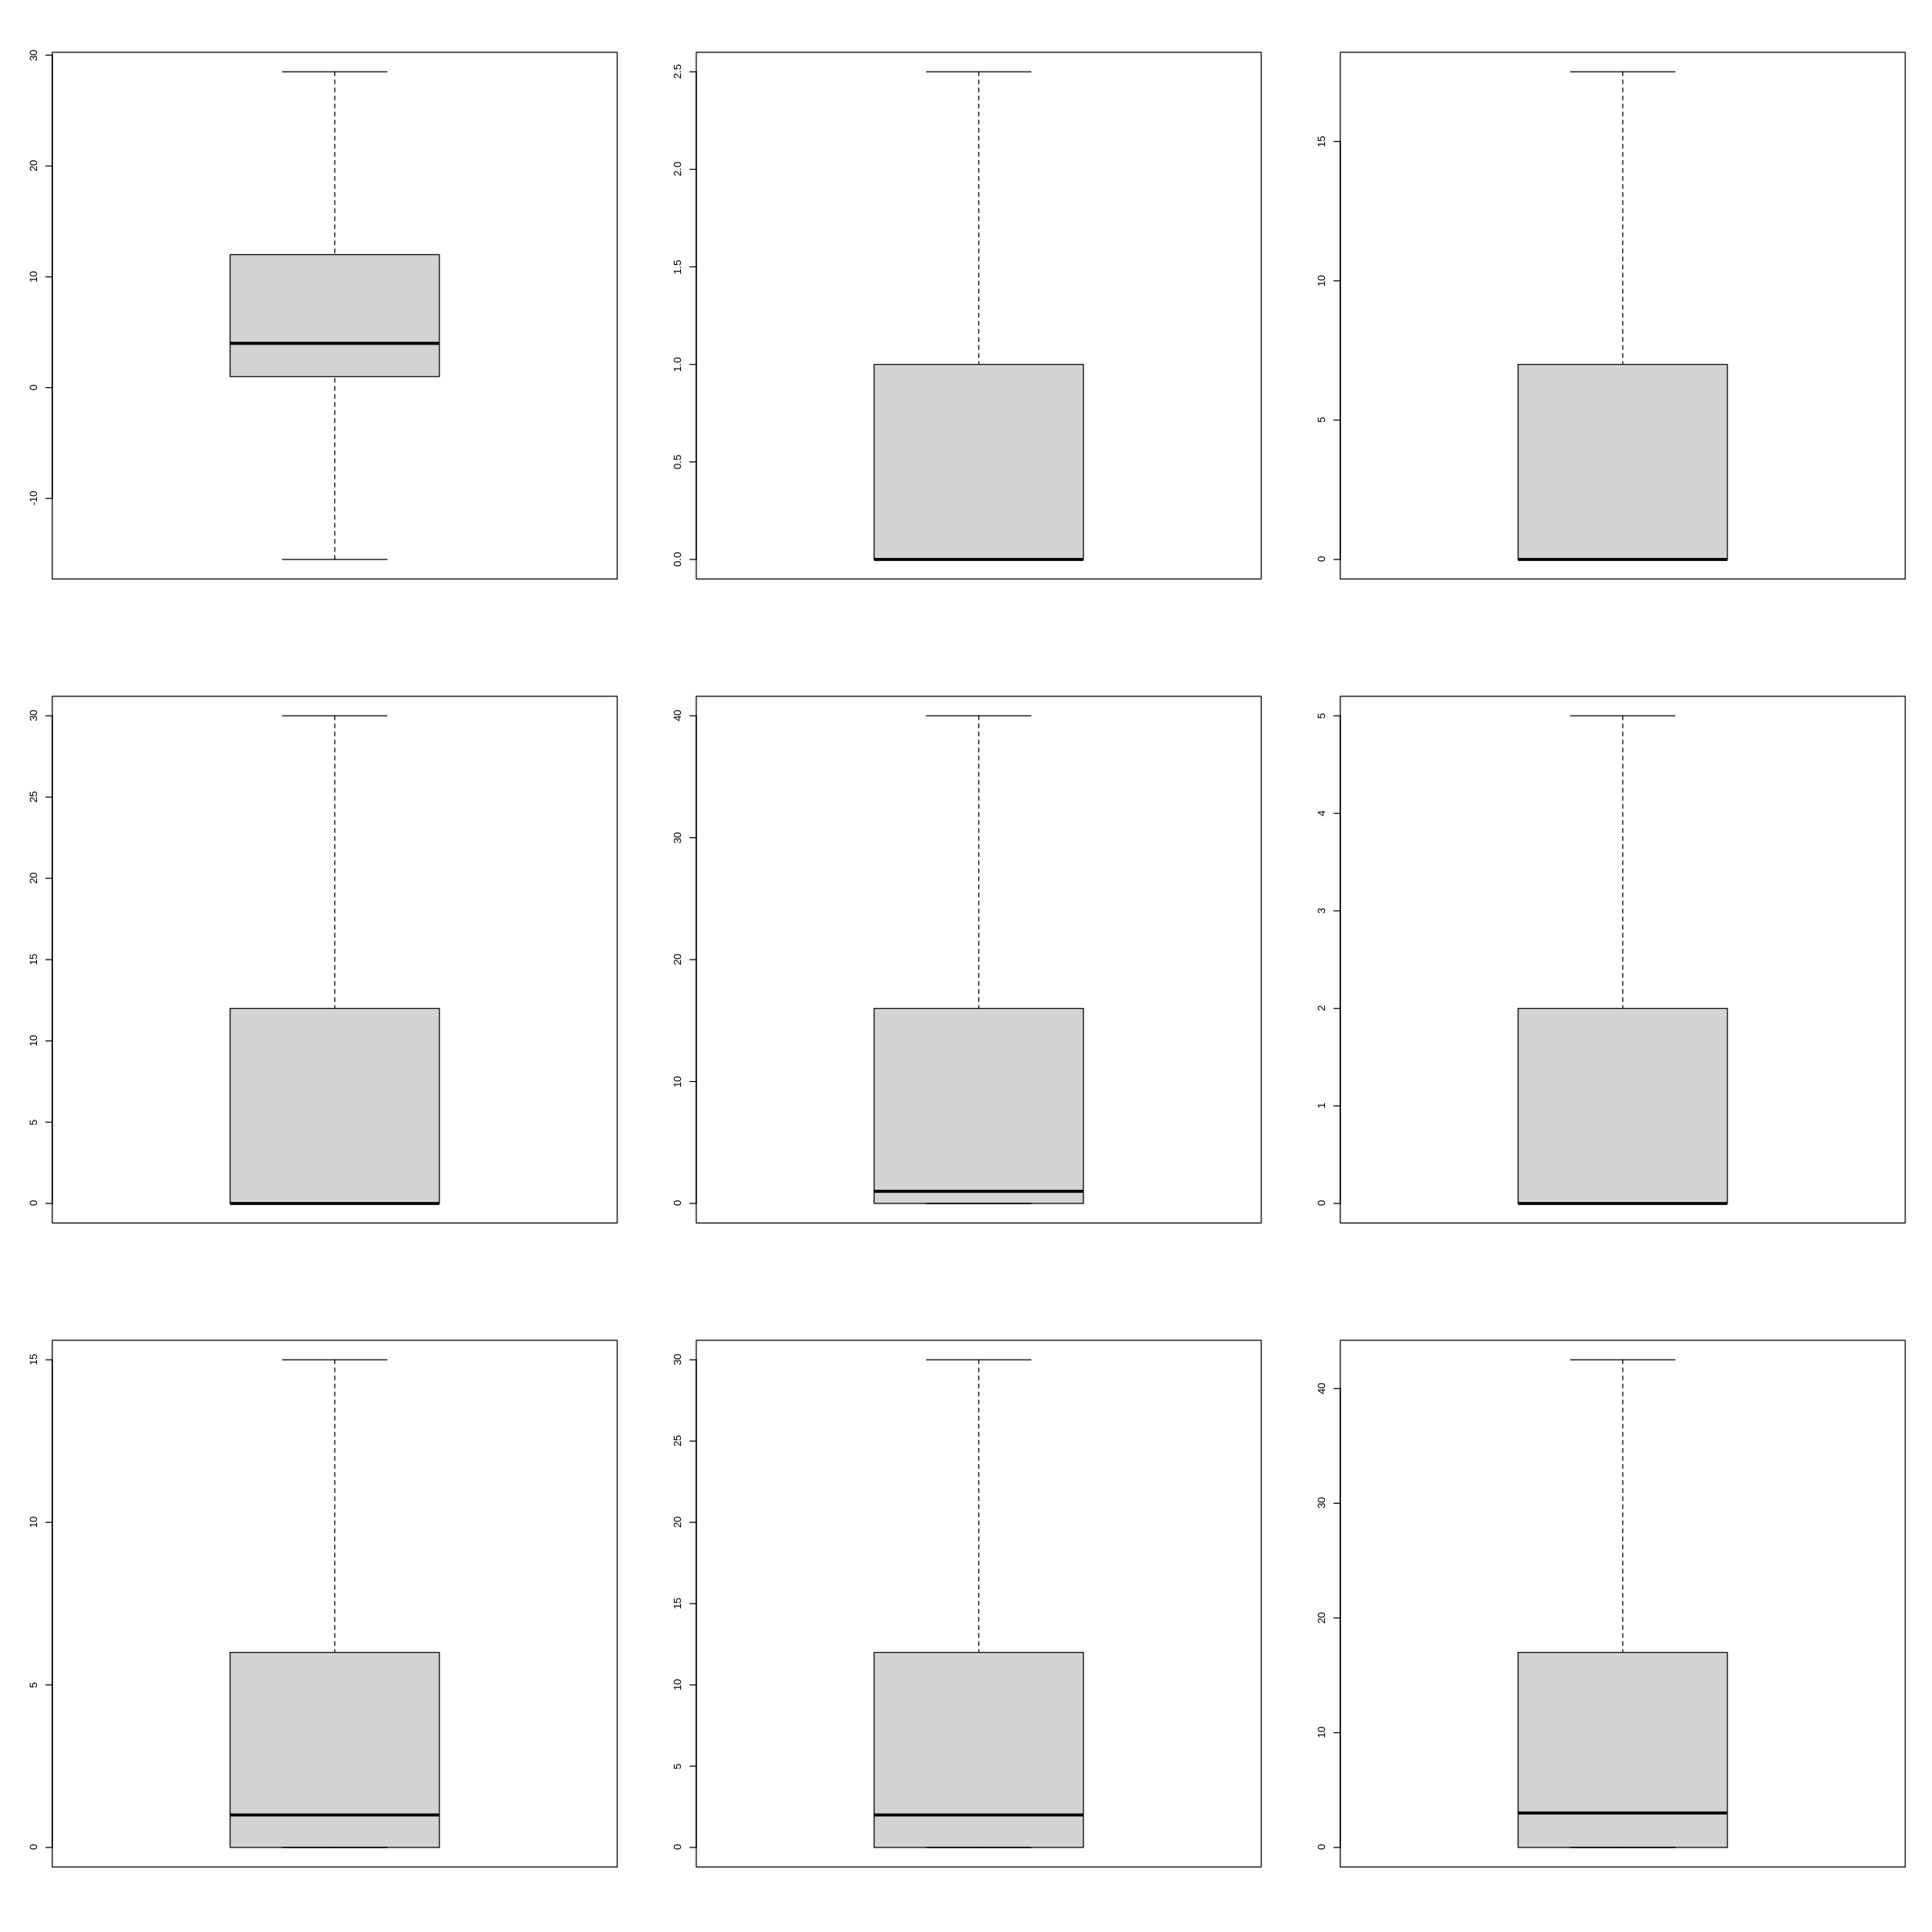

In [15]:
col_names = c('IV','A1', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12')       # new col-names after dropping few columns

# Residual plots
options(repr.plot.width = 20, repr.plot.height = 20)
par(mfrow = c(3,3))

for(col in col_names){
    boxplot(data[,col])
}

In [16]:
apply(data,2, function(x)length(unique(x)))     # count of unique values in data

IV     A1     A2     A5     A6     A7     A8     A9    A10    A12    A13 
    46      4     17     19     31     41      6     16     31     44      2 
   A15    A16    A17    A18    A19    A20    A21    A22 Target 
   101    101      2      2      2      2  22227      2      2

### Statistical Hypothesis Testing 

In [17]:
# Decide the hypothesis
# Null Hypothesis  Ho :  IV, A2, A5, A8, A19 individually has no impact on target variable
# Alternate Hypothesis H1 : IV, A2, A5, A8, A19 individually has an impact

In [18]:
t.test(data$IV, data$Target)


	Welch Two Sample t-test

data:  data$IV and data$Target
t = 153.99, df = 34463, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7.810223 8.011602
sample estimates:
mean of x mean of y 
8.2579610 0.3470489 


In [19]:
t.test(data$A2, data$Target)


	Welch Two Sample t-test

data:  data$A2 and data$Target
t = 337.77, df = 35556, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 6.414155 6.489029
sample estimates:
mean of x mean of y 
6.7986411 0.3470489 


In [20]:
t.test(data$A5, data$Target)


	Welch Two Sample t-test

data:  data$A5 and data$Target
t = 113.11, df = 34677, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.821693 3.956477
sample estimates:
mean of x mean of y 
4.2361338 0.3470489 


In [21]:
t.test(data$A8, data$Target)


	Welch Two Sample t-test

data:  data$A8 and data$Target
t = 86.715, df = 39177, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8428667 0.8818504
sample estimates:
mean of x mean of y 
1.2094074 0.3470489 


In [22]:
t.test(data$A19, data$Target)


	Welch Two Sample t-test

data:  data$A19 and data$Target
t = -69.568, df = 61526, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2247519 -0.2124346
sample estimates:
mean of x mean of y 
0.1284556 0.3470489 


In [23]:
summary(data)

       IV                A1               A2               A5        
 Min.   :-15.500   Min.   :0.0000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:  1.000   1st Qu.:0.0000   1st Qu.: 2.000   1st Qu.: 0.000  
 Median :  4.000   Median :0.0000   Median : 8.000   Median : 0.000  
 Mean   :  8.258   Mean   :0.5781   Mean   : 6.799   Mean   : 4.236  
 3rd Qu.: 12.000   3rd Qu.:1.0000   3rd Qu.: 8.000   3rd Qu.: 7.000  
 Max.   : 28.500   Max.   :2.5000   Max.   :17.000   Max.   :17.500  
       A6              A7               A8              A9        
 Min.   : 0.00   Min.   : 0.000   Min.   :0.000   Min.   : 0.000  
 1st Qu.: 0.00   1st Qu.: 0.000   1st Qu.:0.000   1st Qu.: 0.000  
 Median : 0.00   Median : 1.000   Median :0.000   Median : 1.000  
 Mean   : 7.38   Mean   : 9.977   Mean   :1.209   Mean   : 3.819  
 3rd Qu.:12.00   3rd Qu.:16.000   3rd Qu.:2.000   3rd Qu.: 6.000  
 Max.   :30.00   Max.   :40.000   Max.   :5.000   Max.   :15.000  
      A10              A12             A1

In [24]:
# columns that need to be converted to factor

fac_col = c('A1','A8','A13','A17','A18','A19','A20','A22','Target')

In [25]:
for(col in fac_col) {
    data[,col] = factor(data[,col])
}

In [26]:
str(data)

'data.frame':	34292 obs. of  20 variables:
 $ IV    : num  10 8 28.5 14 20 1 3 2 14 28.5 ...
 $ A1    : Factor w/ 4 levels "0","1","2","2.5": 4 1 3 1 3 1 4 2 1 1 ...
 $ A2    : num  8 12 17 2 8 8 8 8 2 9 ...
 $ A5    : num  3 0 0 0 0 0 6 0 0 0 ...
 $ A6    : num  12 0 0 0 0 1 10 0 0 0 ...
 $ A7    : num  21 0 29 0 0 1 15 0 0 0 ...
 $ A8    : Factor w/ 6 levels "0","1","2","3",..: 4 1 5 3 1 1 2 1 1 1 ...
 $ A9    : num  13 0 8 5 2 0 6 0 0 0 ...
 $ A10   : num  20 0 30 6 3 1 9 0 0 0 ...
 $ A12   : num  33 0 42.5 6 6 1 9 0 0 0 ...
 $ A13   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ A15   : num  0.98 0.74 0.26 0.99 0.28 1 0.79 1 0.77 0.87 ...
 $ A16   : num  0.98 0.74 0.34 0.98 0.37 0.98 0.66 1 0.81 0.72 ...
 $ A17   : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 2 1 ...
 $ A18   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ A19   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ A20   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ A21   : num  17.1

## Model Building

In [27]:
# Split row numbers into 2 sets
set.seed(9)
train_rows = sample(1:nrow(data), size=0.7*nrow(data))
validation_rows = setdiff(1:nrow(data),train_rows)

In [28]:
# Subset into Train and Validation sets
train_data = data[train_rows,]
validation_data = data[validation_rows,]

In [29]:
# View the dimensions of the data
dim(data)
dim(train_data)
dim(validation_data)

[1] 34292    20

[1] 24004    20

[1] 10288    20

In [30]:
# Distribution of data towards train and validation split

table(data$Target)/nrow(data)
table(train_data$Target)/nrow(train_data)
table(validation_data$Target)/nrow(validation_data)


        0         1 
0.6529511 0.3470489 


        0         1 
0.6516831 0.3483169 


        0         1 
0.6559098 0.3440902 

### Logistic regression

In [31]:
# Lets run the models
# Logistic regression

In [32]:
logistic = glm(Target~., family = 'binomial', data = train_data)
summary(logistic)


Call:
glm(formula = Target ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7713  -0.5809  -0.1630   0.5067   3.7253  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.827558  11.170942  -1.327  0.18440    
IV           -0.219212   0.004509 -48.615  < 2e-16 ***
A11           0.097093   0.050191   1.934  0.05305 .  
A12           0.056823   0.077206   0.736  0.46173    
A12.5        -0.205079   0.077105  -2.660  0.00782 ** 
A2           -0.100659   0.005771 -17.442  < 2e-16 ***
A5            0.069564   0.008040   8.652  < 2e-16 ***
A6            0.080773   0.011498   7.025 2.14e-12 ***
A7           -0.051480   0.007999  -6.436 1.23e-10 ***
A81           1.189274   0.058212  20.430  < 2e-16 ***
A82           1.414929   0.076836  18.415  < 2e-16 ***
A83           1.401967   0.099692  14.063  < 2e-16 ***
A84           1.444267   0.126352  11.431  < 2e-16 ***
A85           1.423112   0.1

In [33]:
# Predict on train data to get probability
prob_train = predict(logistic, train_data, type="response")
head(prob_train)

1589        14139         8787        24204          556        19730 
0.1366689085 0.9495411800 0.0041004383 0.0004004592 0.3503036185 0.1594567250

In [34]:
pred_object = prediction(prob_train, train_data$Target)

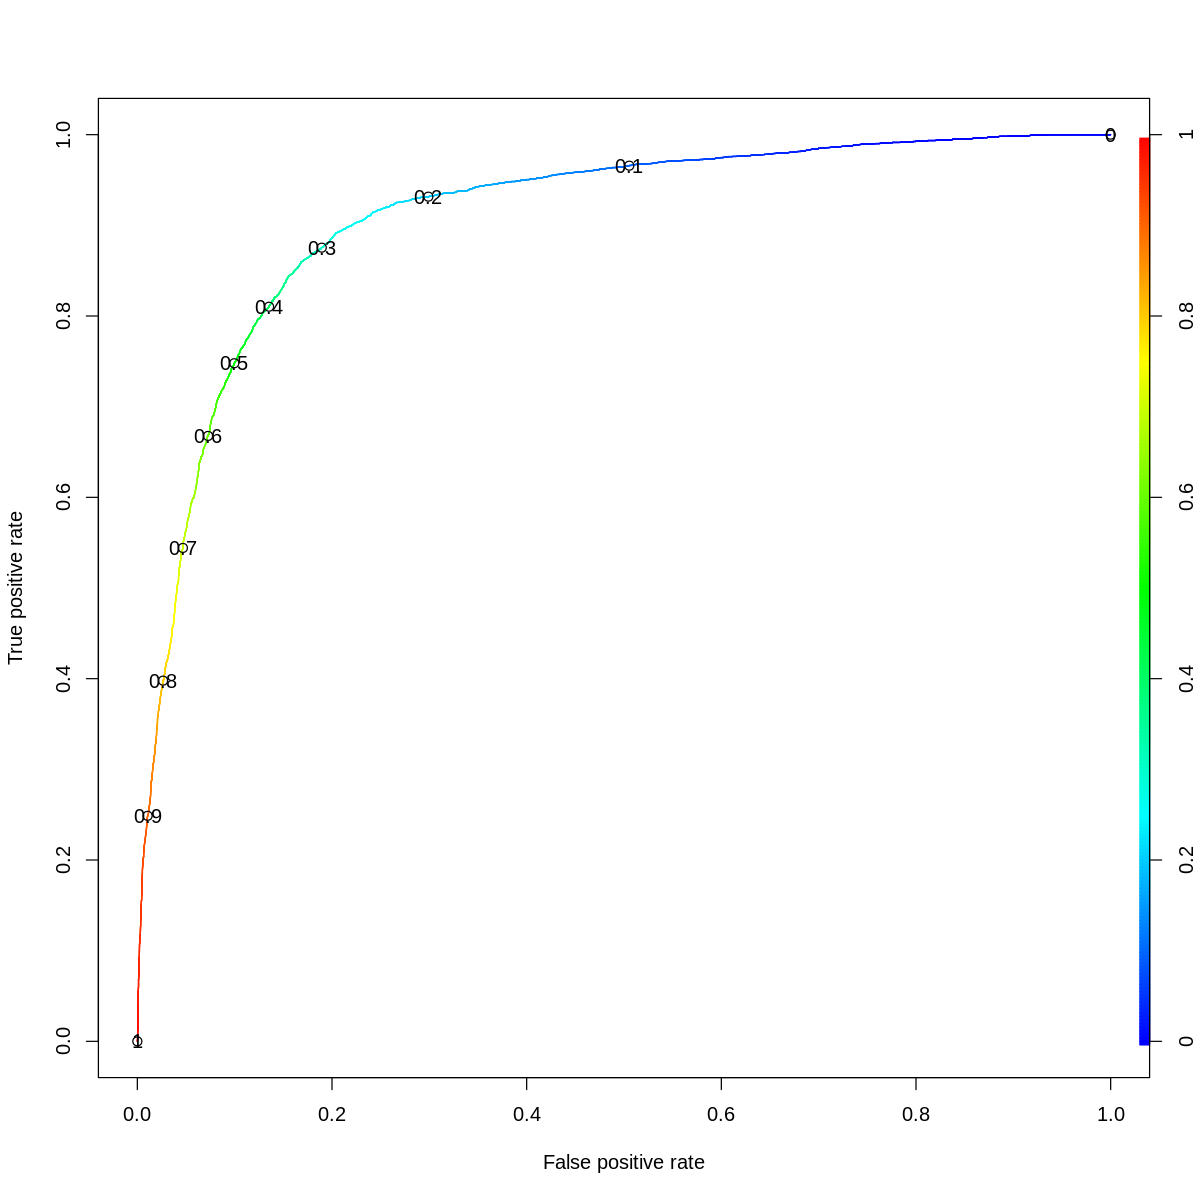

In [35]:
# Compute TPR and FPR to get ROC curve
tpr_fpr = performance(pred_object, measure="tpr", x.measure="fpr")

options(repr.plot.width = 10, repr.plot.height = 10)

# Plot the ROC curve using the extracted performance measures (TPR and FPR)
plot(tpr_fpr, col=rainbow(10), colorize=T, print.cutoffs.at=seq(0,1,0.1))

In [36]:
# Compute Area under the curve (AUC) using the same pred_object
perf_auc = performance(pred_object, measure="auc")
auc = perf_auc@y.values
print(auc)

[[1]]
[1] 0.9093326



In [37]:
# Create a function to output evaluation metrics

eval_metrics = function(actual,preds_val){
    cm = table(actual,preds_val)
    cm = as.data.frame.matrix(cm)[c("1","0"),c("1","0")]
    accuracy = (cm["1","1"]+cm["0","0"]) / sum(cm)
    TP_rate = cm["1","1"] / (cm["1","1"] + cm["1","0"])
    FP_rate = cm["0","1"] / (cm["0","1"] + cm["0","0"])
    TN_rate = cm["0","0"] / (cm["0","0"] + cm["0","1"])
    Precision = cm["1","1"] / (cm["1","1"] + cm["0","1"])
    
    cat("\n")
    cat("Confusion Matrix \n \n")
    print(cm)
    cat("\n")
    cat("Accuracy  :",accuracy,"\n")
    cat("TP_rate   :",TP_rate,"\n")
    cat("FP_rate   :",FP_rate,"\n")
    cat("TN_rate   :",TN_rate,"\n")
    cat("Precision :",Precision,"\n")
    cat("\n")
}

In [38]:
# Predicting on train data
prob_train_vanilla = predict(logistic, train_data, type="response") 
# Setting 0.1 as threshold
preds_train_vanilla_0.3 = as.factor(ifelse(prob_train_vanilla > 0.3,1, 0))
head(preds_train_vanilla_0.3)

1589 14139  8787 24204   556 19730 
    0     1     0     0     1     0 
Levels: 0 1

In [39]:
# Predicting on validation data with the same threshold
prob_val_vanilla = predict(logistic, validation_data, type="response")
head(prob_val_vanilla)
preds_validation_vanilla_0.3 = as.factor(ifelse(prob_val_vanilla > 0.3,1, 0))

2         19         21         22         24         27 
0.04194748 0.29905807 0.89838954 0.13575851 0.25647564 0.22839817

In [40]:
# Print Metrics
cat("Train Metrics")
eval_metrics(train_data$Target,preds_train_vanilla_0.3)
cat("Validation Metrics")
eval_metrics(validation_data$Target,preds_validation_vanilla_0.3)

Train Metrics
Confusion Matrix 
 
     1     0
1 7319  1042
0 2963 12680

Accuracy  : 0.8331528 
TP_rate   : 0.8753738 
FP_rate   : 0.1894138 
TN_rate   : 0.8105862 
Precision : 0.7118265 

Validation Metrics
Confusion Matrix 
 
     1    0
1 3056  484
0 1284 5464

Accuracy  : 0.8281493 
TP_rate   : 0.8632768 
FP_rate   : 0.1902786 
TN_rate   : 0.8097214 
Precision : 0.7041475 



In [41]:
# Select the best model using stepAIC
library(MASS)
step_aic_model = stepAIC(logistic)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=17714.38
Target ~ IV + A1 + A2 + A5 + A6 + A7 + A8 + A9 + A10 + A12 + 
    A13 + A15 + A16 + A17 + A18 + A19 + A20 + A21 + A22

       Df Deviance   AIC
- A12   1    17662 17712
- A13   1    17663 17713
- A18   1    17663 17713
- A21   1    17664 17714
<none>       17662 17714
- A16   1    17665 17715
- A22   1    17666 17716
- A15   1    17666 17716
- A10   1    17666 17716
- A20   1    17666 17716
- A19   1    17670 17720
- A1    3    17676 17722
- A7    1    17706 17756
- A17   1    17708 17758
- A6    1    17714 17764
- A5    1    17739 17789
- A9    1    17757 17807
- A2    1    17974 18024
- A8    5    18274 18316
- IV    1    22517 22567

Step:  AIC=17712.43
Target ~ IV + A1 + A2 + A5 + A6 + A7 + A8 + A9 + A10 + A13 + 
    A15 + A16 + A17 + A18 + A19 + A20 + A21 + A22

       Df Deviance   AIC
- A13   1    17663 17711
- A18   1    17663 17711
- A21   1    17664 17712
<none>       17662 17712
- A16   1    17665 17713
- A22   1    17666 17714
- A15   1    17666 17714
-

AIC is 17709

In [42]:
step_aic_model$call

glm(formula = Target ~ IV + A1 + A2 + A5 + A6 + A7 + A8 + A9 + 
    A10 + A15 + A16 + A17 + A19 + A20 + A22, family = "binomial", 
    data = train_data)

In [43]:
# VIF
library(car)
log_reg_vif = vif(logistic)
log_reg_vif

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




,GVIF,Df,GVIF^(1/(2*Df))
IV,1.453934,1,1.205792
A1,1.242261,3,1.036817
A2,1.141210,1,1.068274
A5,6.663294,1,2.581336
A6,38.303806,1,6.189007
A7,32.890196,1,5.734998
A8,4.200424,5,1.154328
A9,15.123335,1,3.888873
A10,41.947652,1,6.476701
A12,29.845841,1,5.463135


In [44]:
log_2_model = glm(formula = Target ~ IV + A1 + A2 + A5 + A6 + A7 + A8 + A9 + 
    A10 + A15 + A16 + A17 + A19 + A20 + A22, family = "binomial", 
    data = train_data)

In [45]:
# Predict on train data to get probability
prob_train = predict(log_2_model, train_data, type="response")
head(prob_train)

1589        14139         8787        24204          556        19730 
0.1379900819 0.9489188903 0.0042751957 0.0004207703 0.3471617481 0.1657385995

In [46]:
pred_object = prediction(prob_train, train_data$Target)

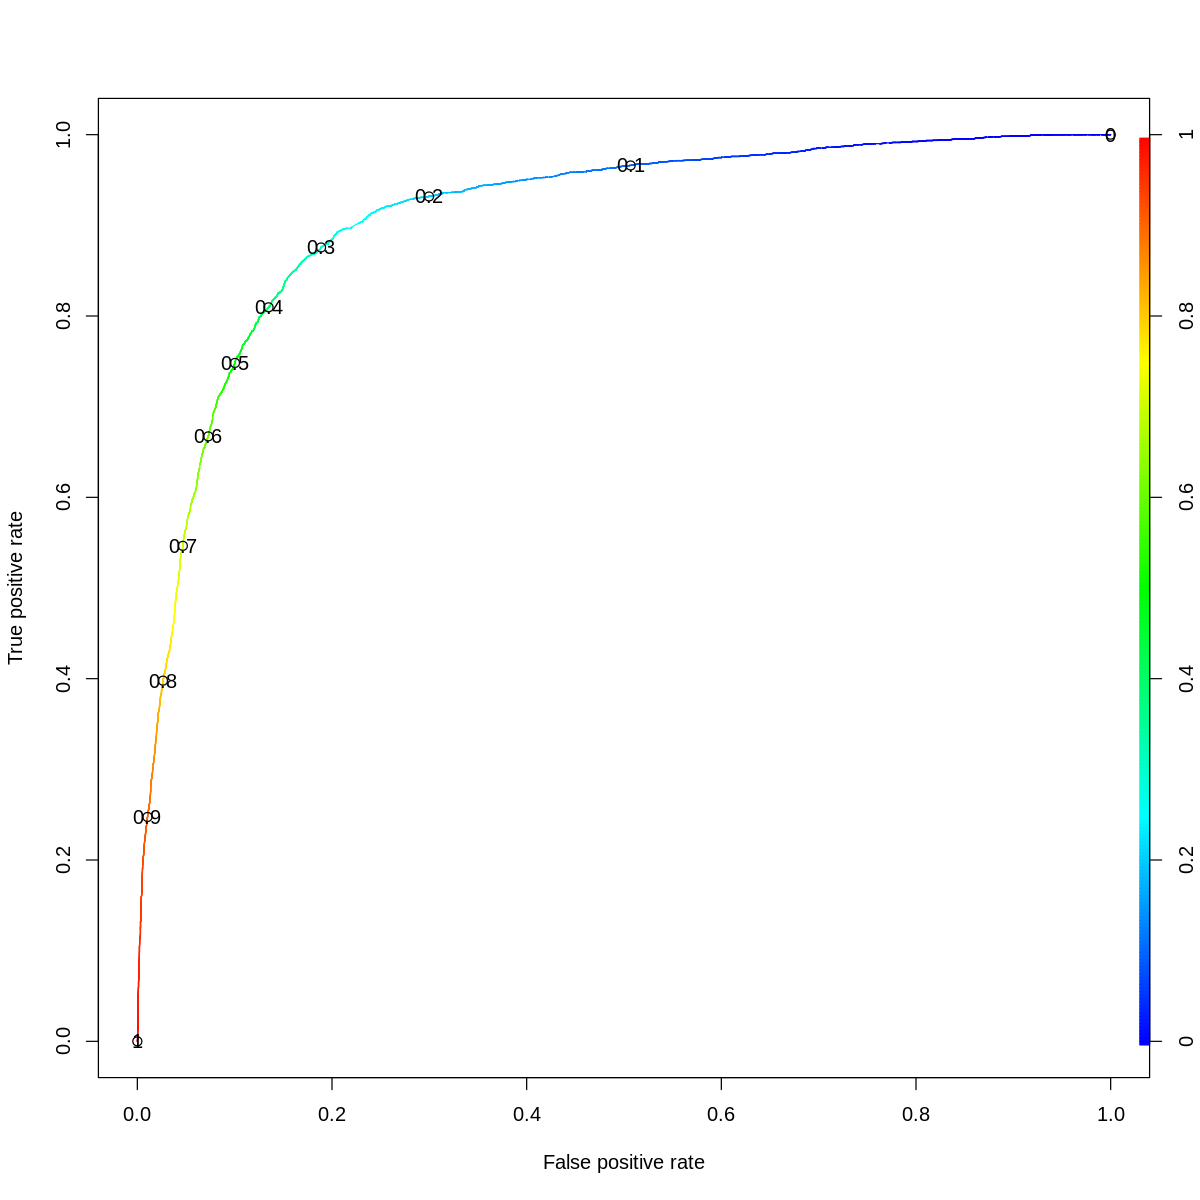

In [47]:
# Compute TPR and FPR to get ROC curve
tpr_fpr = performance(pred_object, measure="tpr", x.measure="fpr")

# Plot the ROC curve using the extracted performance measures (TPR and FPR)
plot(tpr_fpr, col=rainbow(10), colorize=T, print.cutoffs.at=seq(0,1,0.1))

In [48]:
# Compute Area under the curve (AUC) using the same pred_object
perf_auc = performance(pred_object, measure="auc")
auc = perf_auc@y.values
print(auc)

[[1]]
[1] 0.9092633



In [49]:
# Predicting on validation data with the same threshold
prob_val_vanilla = predict(log_2_model, validation_data, type="response")
head(prob_val_vanilla)
preds_validation_vanilla_0.3 = as.factor(ifelse(prob_val_vanilla > 0.3,1, 0))

2         19         21         22         24         27 
0.04197107 0.29430860 0.90148148 0.14088330 0.26332269 0.22623541

In [50]:
# Print Metrics
cat("Train Metrics")
eval_metrics(train_data$Target,preds_train_vanilla_0.3)
cat("Validation Metrics")
eval_metrics(validation_data$Target,preds_validation_vanilla_0.3)

Train Metrics
Confusion Matrix 
 
     1     0
1 7319  1042
0 2963 12680

Accuracy  : 0.8331528 
TP_rate   : 0.8753738 
FP_rate   : 0.1894138 
TN_rate   : 0.8105862 
Precision : 0.7118265 

Validation Metrics
Confusion Matrix 
 
     1    0
1 3057  483
0 1279 5469

Accuracy  : 0.8287325 
TP_rate   : 0.8635593 
FP_rate   : 0.1895376 
TN_rate   : 0.8104624 
Precision : 0.7050277 



In [51]:
str(data)

'data.frame':	34292 obs. of  20 variables:
 $ IV    : num  10 8 28.5 14 20 1 3 2 14 28.5 ...
 $ A1    : Factor w/ 4 levels "0","1","2","2.5": 4 1 3 1 3 1 4 2 1 1 ...
 $ A2    : num  8 12 17 2 8 8 8 8 2 9 ...
 $ A5    : num  3 0 0 0 0 0 6 0 0 0 ...
 $ A6    : num  12 0 0 0 0 1 10 0 0 0 ...
 $ A7    : num  21 0 29 0 0 1 15 0 0 0 ...
 $ A8    : Factor w/ 6 levels "0","1","2","3",..: 4 1 5 3 1 1 2 1 1 1 ...
 $ A9    : num  13 0 8 5 2 0 6 0 0 0 ...
 $ A10   : num  20 0 30 6 3 1 9 0 0 0 ...
 $ A12   : num  33 0 42.5 6 6 1 9 0 0 0 ...
 $ A13   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ A15   : num  0.98 0.74 0.26 0.99 0.28 1 0.79 1 0.77 0.87 ...
 $ A16   : num  0.98 0.74 0.34 0.98 0.37 0.98 0.66 1 0.81 0.72 ...
 $ A17   : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 2 1 ...
 $ A18   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ A19   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ A20   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ A21   : num  17.1

### Ridge Regression

In [52]:
dim(train_data)

[1] 24004    20

In [53]:
## Converting categorical attributes into dummy variables 

train_dummy_data <- model.matrix(~.,train_data)
head(train_dummy_data)

,(Intercept),IV,A11,A12,A12.5,A2,A5,A6,A7,A81,⋯,A131,A15,A16,A171,A181,A191,A201,A21,A221,Target1
1589,1,1.0,0,0,0,9,0.0,0,0,0,⋯,0,0.99,0.99,1,0,0,1,17.03629,0,0
14139,1,0.0,0,0,0,2,17.5,30,40,1,⋯,0,0.83,0.88,0,0,1,1,17.06907,0,1
8787,1,18.0,0,0,0,8,0.0,0,0,0,⋯,0,0.99,0.98,1,0,0,1,17.00633,0,0
24204,1,28.5,0,0,0,13,0.0,0,0,0,⋯,0,0.80,0.82,0,0,0,1,17.00212,0,0
556,1,0.0,0,0,0,9,4.0,4,4,0,⋯,0,0.70,0.66,0,0,0,1,17.06539,0,0
19730,1,11.0,0,0,0,8,0.0,0,0,0,⋯,0,0.76,0.71,0,0,0,1,17.00710,0,0


In [54]:
## Remove the first column

train_dummy_data <- train_dummy_data[,-1]
head(train_dummy_data)

,IV,A11,A12,A12.5,A2,A5,A6,A7,A81,A82,⋯,A131,A15,A16,A171,A181,A191,A201,A21,A221,Target1
1589,1.0,0,0,0,9,0.0,0,0,0,0,⋯,0,0.99,0.99,1,0,0,1,17.03629,0,0
14139,0.0,0,0,0,2,17.5,30,40,1,0,⋯,0,0.83,0.88,0,0,1,1,17.06907,0,1
8787,18.0,0,0,0,8,0.0,0,0,0,0,⋯,0,0.99,0.98,1,0,0,1,17.00633,0,0
24204,28.5,0,0,0,13,0.0,0,0,0,0,⋯,0,0.80,0.82,0,0,0,1,17.00212,0,0
556,0.0,0,0,0,9,4.0,4,4,0,0,⋯,0,0.70,0.66,0,0,0,1,17.06539,0,0
19730,11.0,0,0,0,8,0.0,0,0,0,0,⋯,0,0.76,0.71,0,0,0,1,17.00710,0,0


In [55]:
## Perform the same steps on validation data

validation_dummy_data <- model.matrix(~.,validation_data)
validation_dummy_data <- validation_dummy_data[,-1]

head(validation_dummy_data)

,IV,A11,A12,A12.5,A2,A5,A6,A7,A81,A82,⋯,A131,A15,A16,A171,A181,A191,A201,A21,A221,Target1
2,8,0,0,0,12,0,0,0,0,0,⋯,0,0.74,0.74,0,0,0,1,17.05124,0,0
19,4,0,0,0,12,0,0,0,1,0,⋯,0,0.37,0.34,1,0,0,1,17.07400,0,0
21,6,0,0,0,2,9,18,27,0,0,⋯,0,0.13,0.17,0,0,0,1,17.01411,0,0
22,2,0,0,0,8,0,0,0,0,0,⋯,0,0.80,0.82,1,0,0,1,17.00192,0,0
24,0,0,0,0,8,0,0,0,0,0,⋯,0,0.82,0.80,0,0,0,1,17.01065,0,0
27,5,0,0,0,8,9,9,15,0,0,⋯,0,0.72,0.77,0,0,0,1,17.06046,0,0


In [56]:
## dimensions
dim(train_dummy_data)

[1] 24004    26

In [57]:
## column names
colnames(train_dummy_data)

[1] "IV"      "A11"     "A12"     "A12.5"   "A2"      "A5"      "A6"     
 [8] "A7"      "A81"     "A82"     "A83"     "A84"     "A85"     "A9"     
[15] "A10"     "A12"     "A131"    "A15"     "A16"     "A171"    "A181"   
[22] "A191"    "A201"    "A21"     "A221"    "Target1"

In [58]:
## Split X and Y
train_x <- train_dummy_data[,-26]
train_y <- train_dummy_data[,26]

validation_x <- validation_dummy_data[,-26]
validation_y <- validation_dummy_data[,26]


In [59]:
head(train_y)

1589 14139  8787 24204   556 19730 
    0     1     0     0     0     0

Loading required package: Matrix

Loaded glmnet 4.1-1



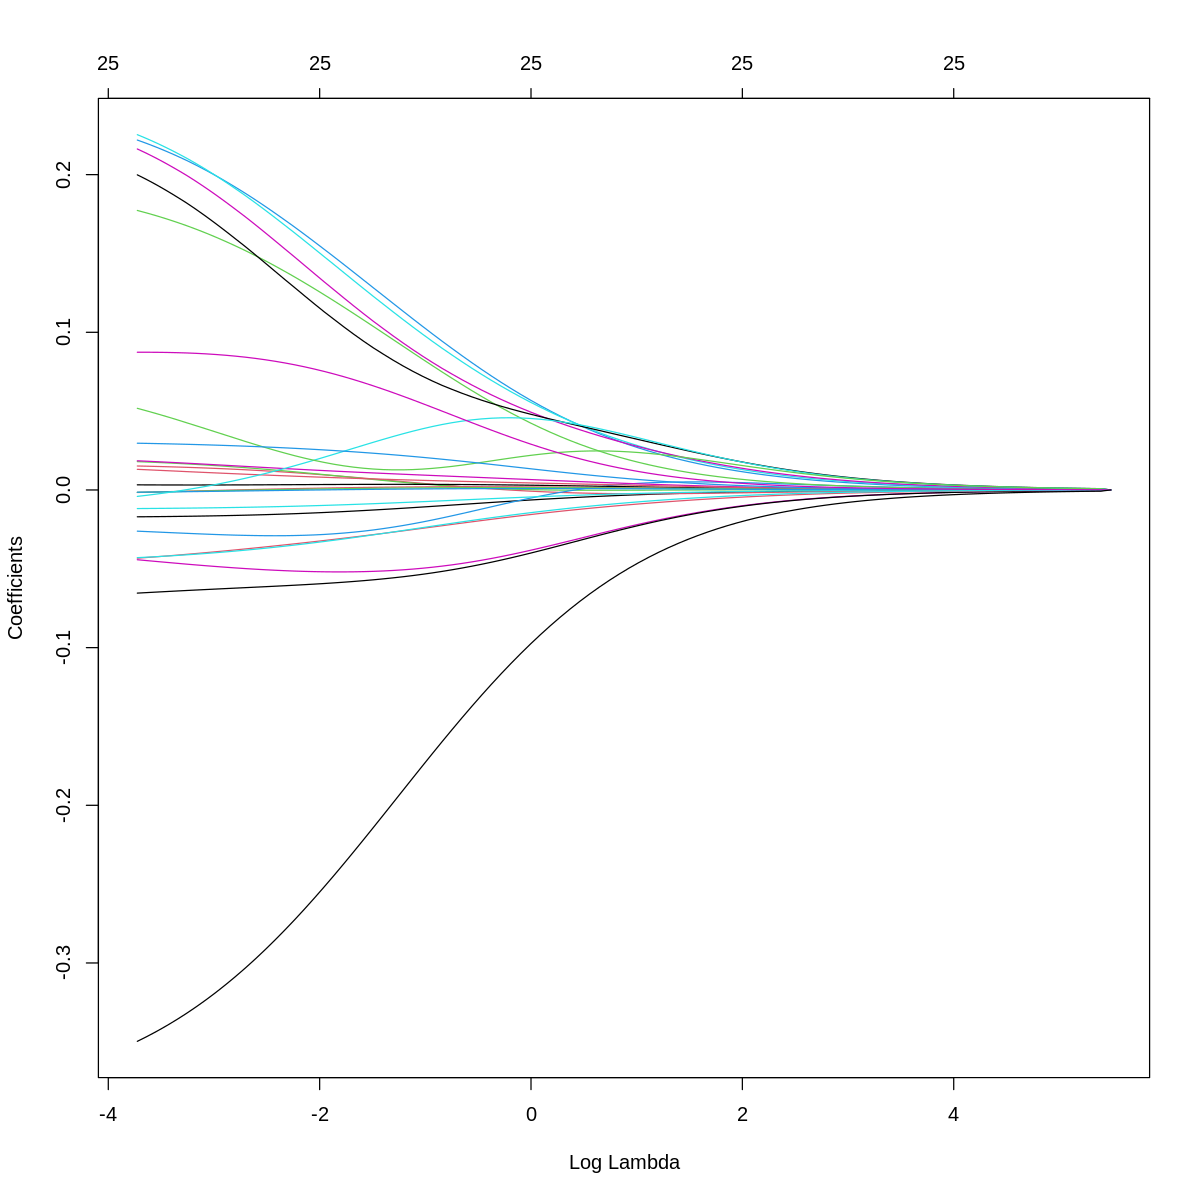

In [60]:
## Build a ridge regression model
library(glmnet)

ridge_model <- glmnet(train_x,train_y,alpha = 0)

## plot the model
plot(ridge_model,xvar="lambda")

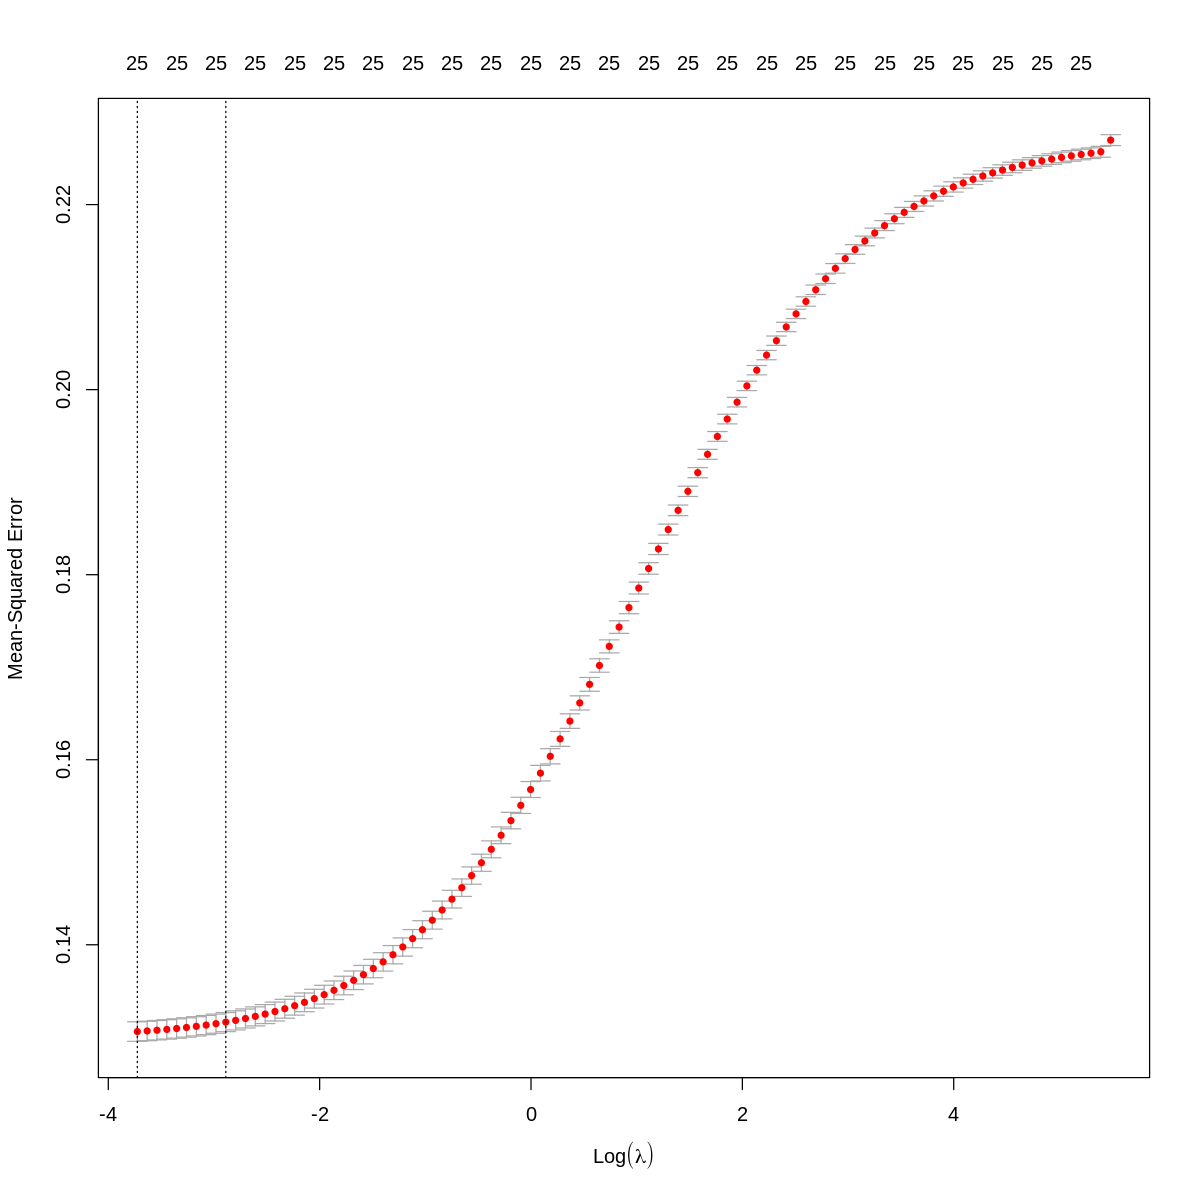

In [61]:
## Model Selection with CV
set.seed(1)
ridge_model_cv <- cv.glmnet(train_x,train_y,alpha=0,nfolds = 10)

## Plot
plot(ridge_model_cv)

In [62]:
pred_train_ridge_cv = predict(ridge_model_cv,train_x)
pred_train_ridge_fact = as.factor(ifelse(pred_train_ridge_cv > 0.3,1,0))

pred_validation_ridge_cv = predict(ridge_model_cv,validation_x)
pred_val_ridge_fact = as.factor(ifelse(pred_validation_ridge_cv > 0.3,1,0))

In [63]:
eval_metrics(actual =train_y, preds = pred_train_ridge_fact)
eval_metrics(actual = validation_y, preds = pred_val_ridge_fact)


Confusion Matrix 
 
     1     0
1 7690   671
0 4253 11390

Accuracy  : 0.7948675 
TP_rate   : 0.9197464 
FP_rate   : 0.2718788 
TN_rate   : 0.7281212 
Precision : 0.6438918 


Confusion Matrix 
 
     1    0
1 3240  300
0 1852 4896

Accuracy  : 0.7908243 
TP_rate   : 0.9152542 
FP_rate   : 0.2744517 
TN_rate   : 0.7255483 
Precision : 0.6362922 



### Lasso

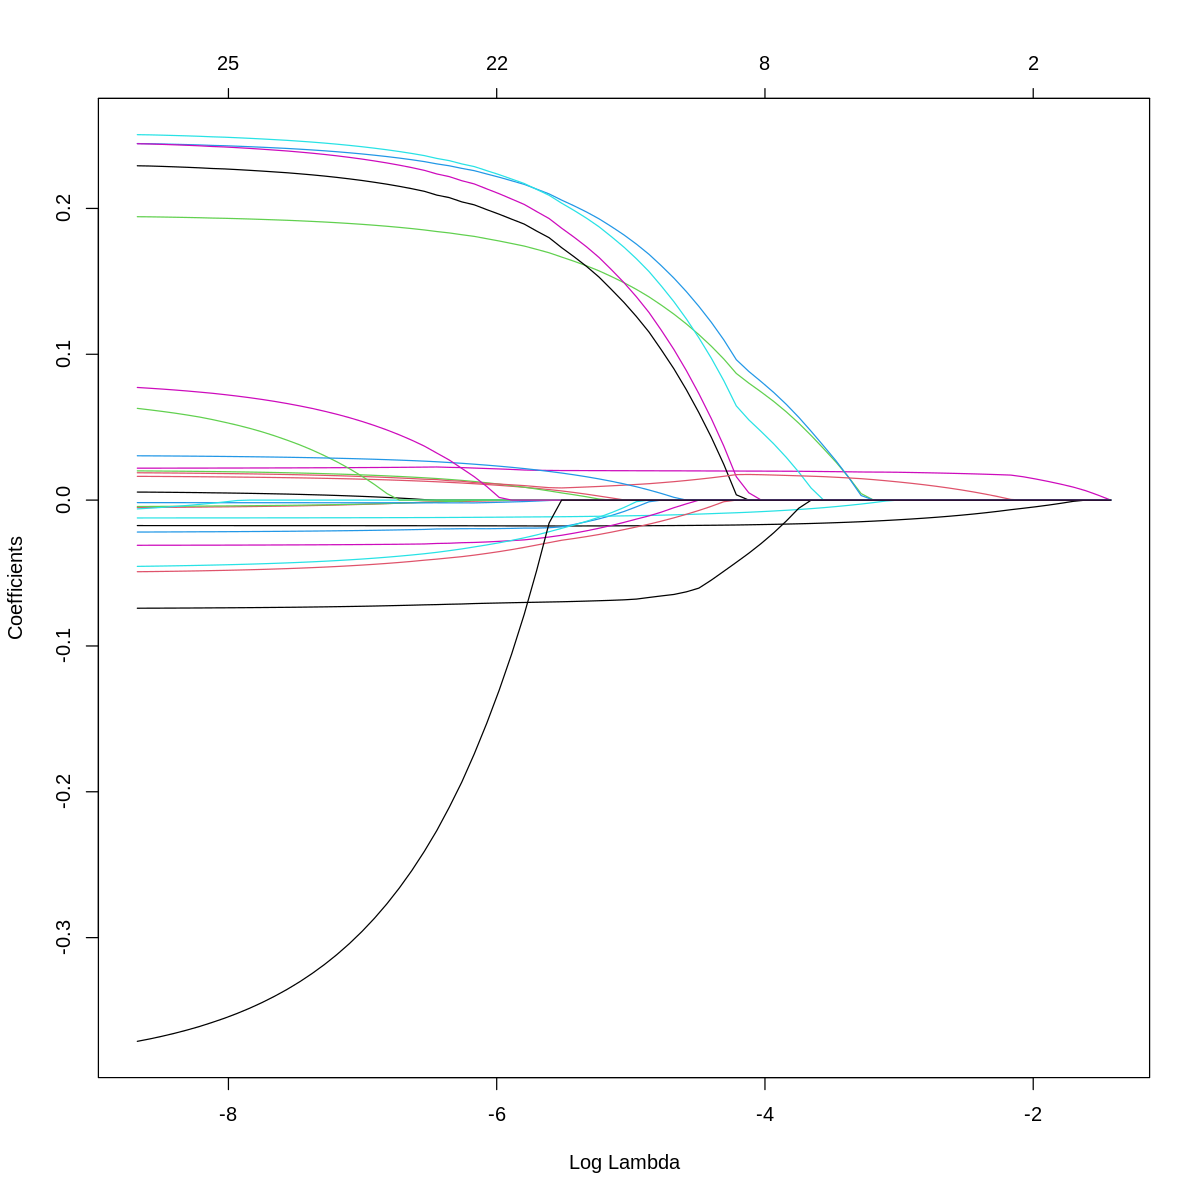

In [64]:
## Build lasso model
lasso_model <- glmnet(train_x, train_y, alpha = 1)

## plot
plot(lasso_model,xvar="lambda")

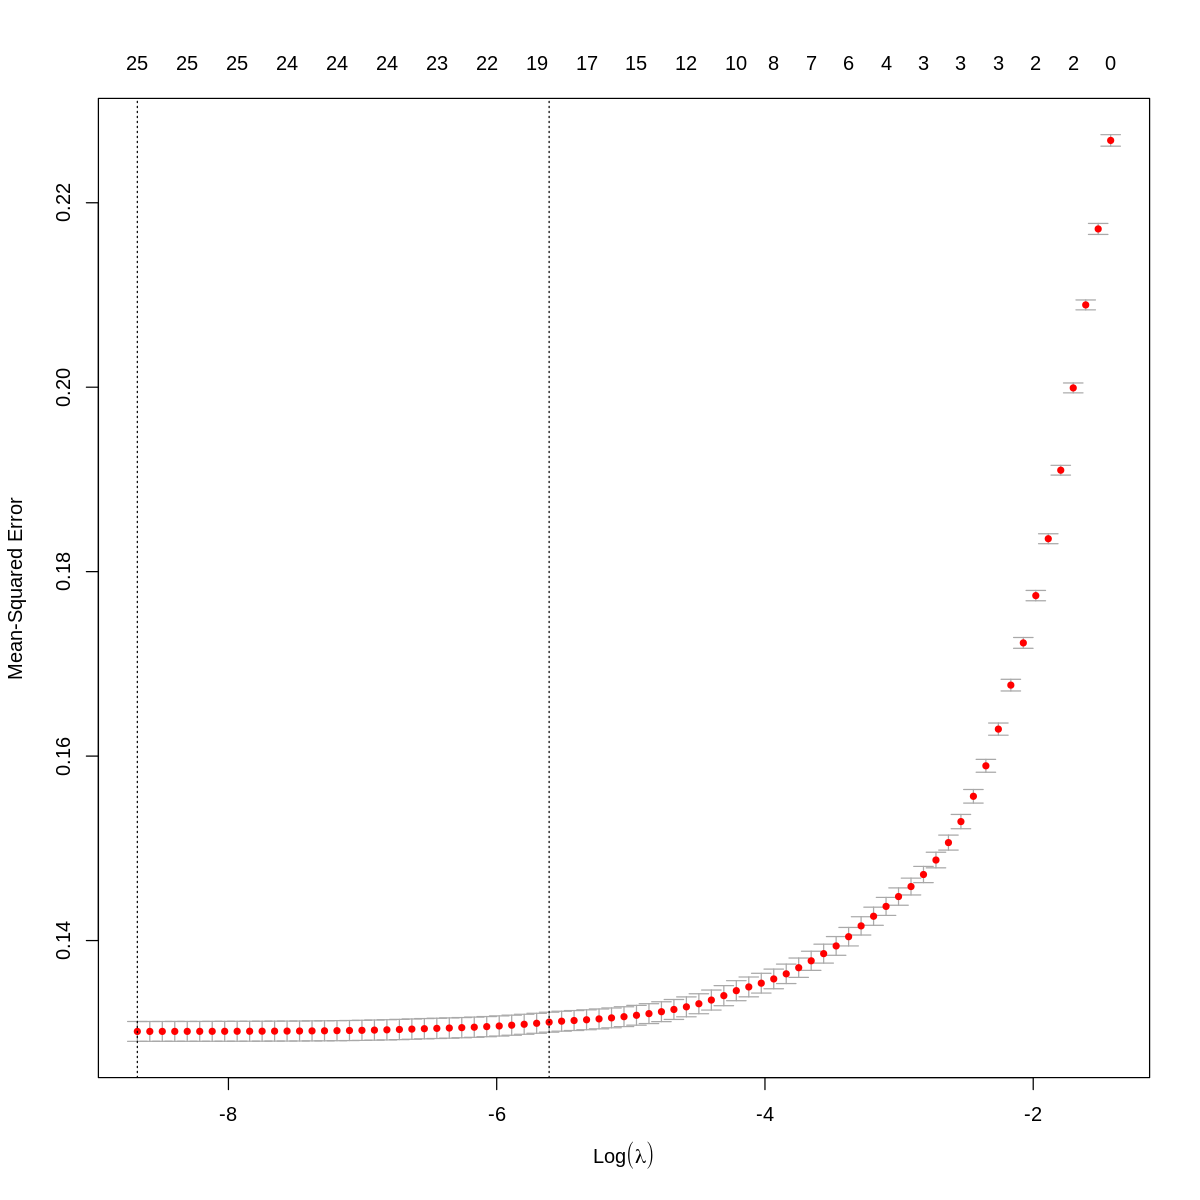

In [65]:
## Lasso Model Selection with CV
set.seed(1)
lasso_model_cv <- cv.glmnet(train_x,train_y,alpha=1,nfolds = 10)

## Plot
plot(lasso_model_cv)

In [66]:
pred_train_lasso_cv = predict(lasso_model_cv,train_x)
pred_train_lasso_fact = as.factor(ifelse(pred_train_lasso_cv > 0.3,1,0))

pred_validation_lasso_cv = predict(lasso_model_cv,validation_x)
pred_val_lasso_fact = as.factor(ifelse(pred_validation_lasso_cv > 0.3,1,0))

In [67]:
eval_metrics(actual = train_y, preds = pred_train_lasso_fact)
eval_metrics(actual = validation_y, preds = pred_val_lasso_fact)


Confusion Matrix 
 
     1     0
1 7681   680
0 4213 11430

Accuracy  : 0.796159 
TP_rate   : 0.91867 
FP_rate   : 0.2693217 
TN_rate   : 0.7306783 
Precision : 0.6457878 


Confusion Matrix 
 
     1    0
1 3234  306
0 1827 4921

Accuracy  : 0.7926711 
TP_rate   : 0.9135593 
FP_rate   : 0.2707469 
TN_rate   : 0.7292531 
Precision : 0.6390041 



### Elastic Net

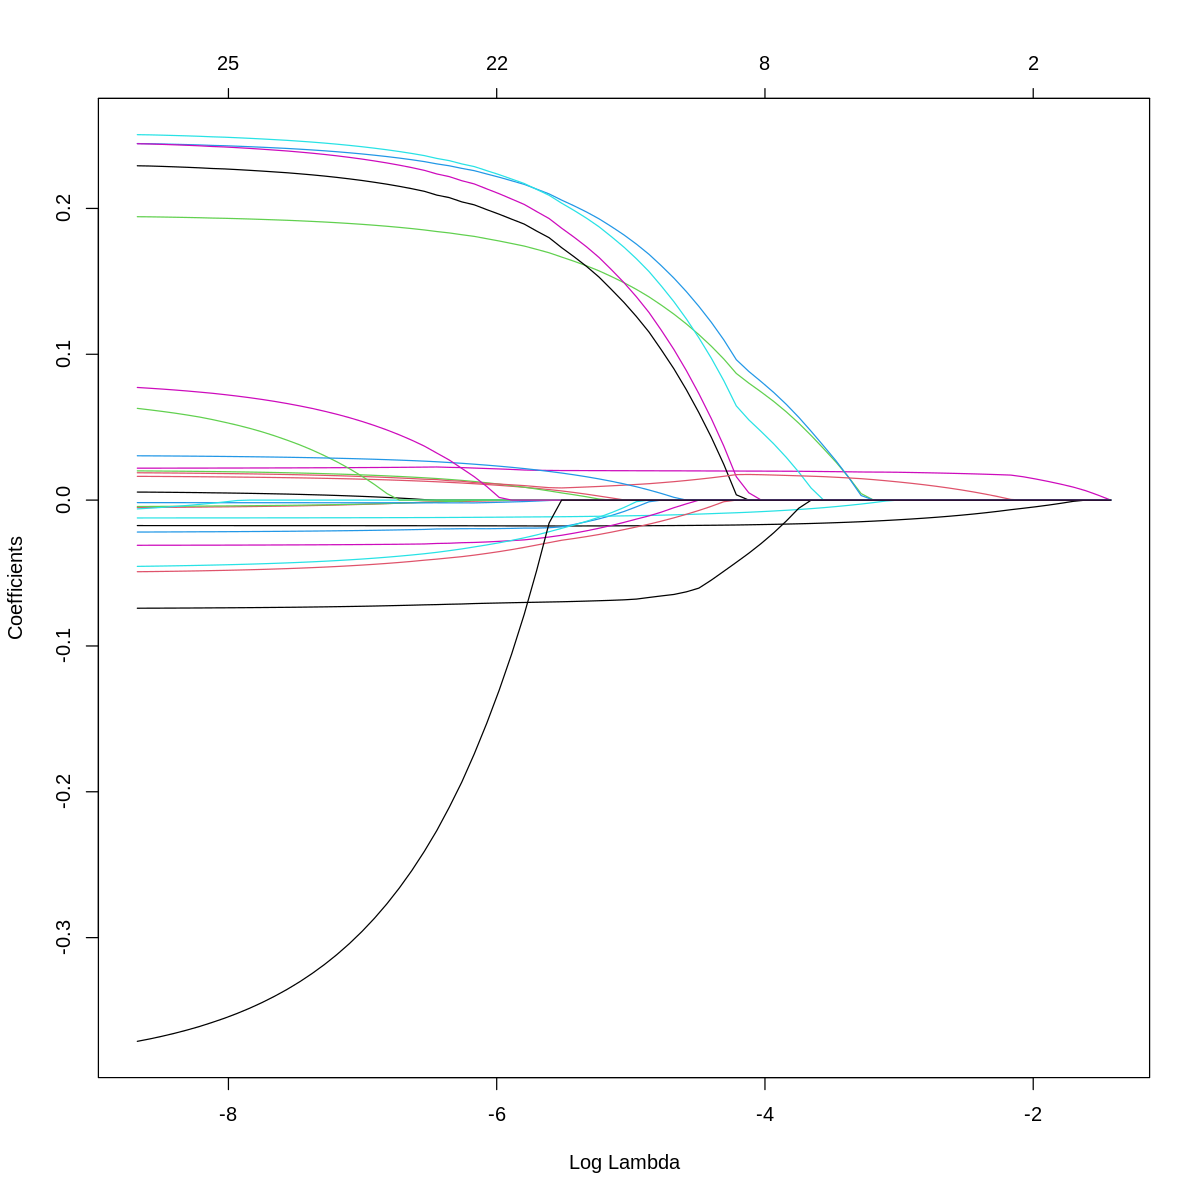

In [68]:
## Build lasso model
elastic_model <- glmnet(train_x, train_y, alpha = 1)

## plot
plot(elastic_model,xvar="lambda")

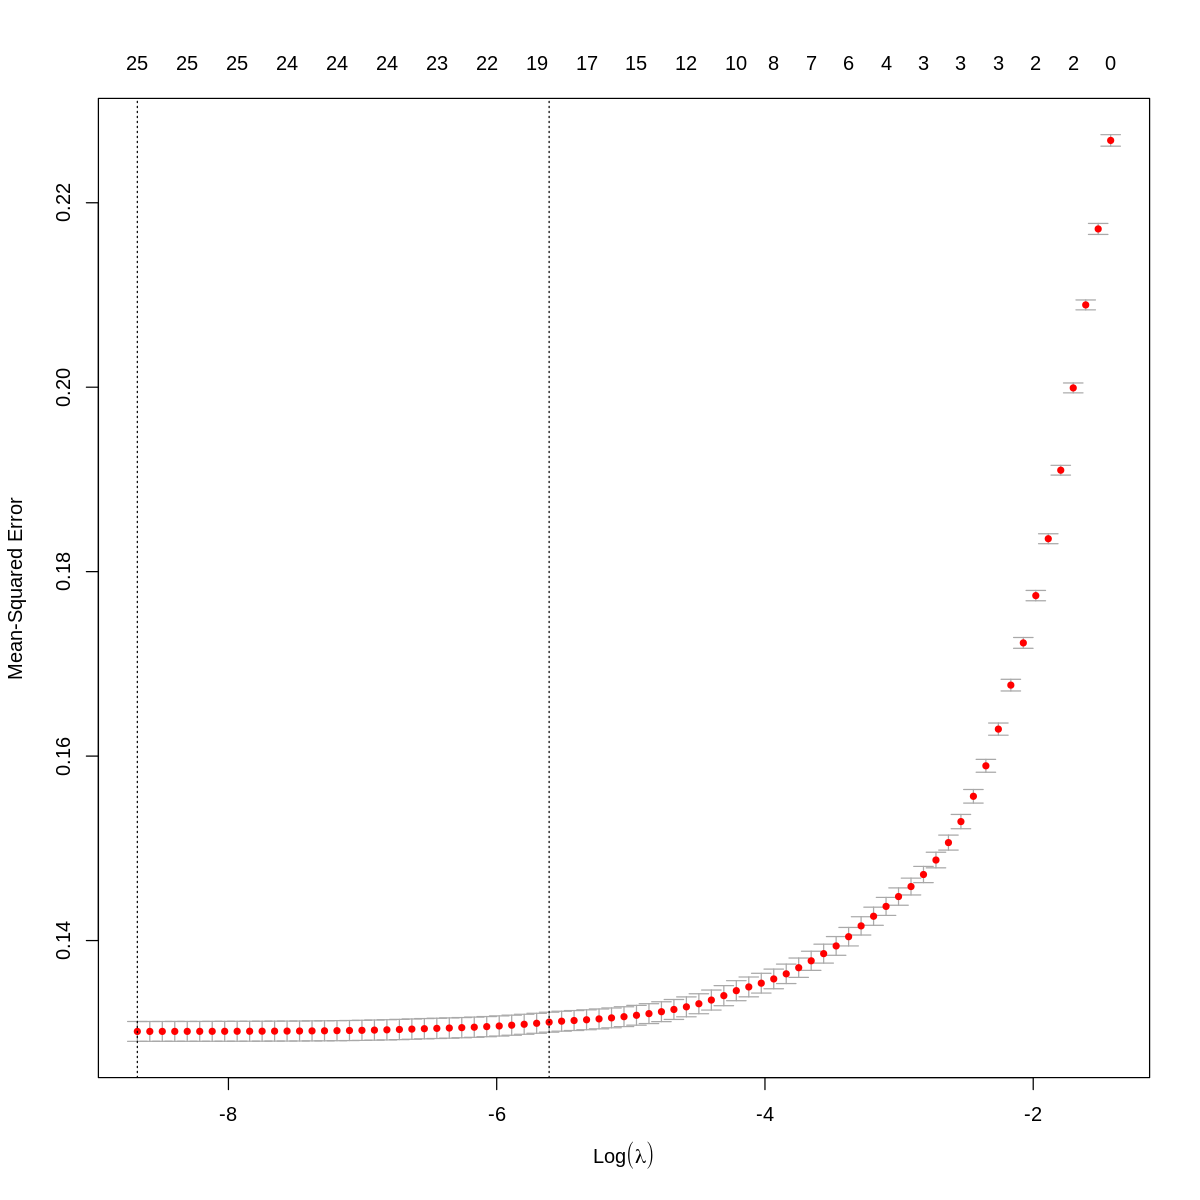

In [69]:
## Lasso Model Selection with CV
set.seed(1)
elastic_model_cv <- cv.glmnet(train_x,train_y,alpha=1,nfolds = 10)

## Plot
plot(elastic_model_cv)

In [70]:
pred_train_elastic_cv = predict(elastic_model_cv,train_x)
pred_train_elastic_fact = as.factor(ifelse(pred_train_elastic_cv > 0.3,1,0))

pred_validation_elastic_cv = predict(elastic_model_cv,validation_x)
pred_val_elastic_fact = as.factor(ifelse(pred_validation_elastic_cv > 0.3,1,0))

In [71]:
eval_metrics(actual = train_y, preds = pred_train_elastic_fact)
eval_metrics(actual = validation_y, preds = pred_val_elastic_fact)


Confusion Matrix 
 
     1     0
1 7681   680
0 4213 11430

Accuracy  : 0.796159 
TP_rate   : 0.91867 
FP_rate   : 0.2693217 
TN_rate   : 0.7306783 
Precision : 0.6457878 



NULL


Confusion Matrix 
 
     1    0
1 3234  306
0 1827 4921

Accuracy  : 0.7926711 
TP_rate   : 0.9135593 
FP_rate   : 0.2707469 
TN_rate   : 0.7292531 
Precision : 0.6390041 



### Naive Bayes

In [72]:
# load library
library(e1071)

# build model
model = naiveBayes(Target~ ., data = train_data)

In [73]:
# check model
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6516831 0.3483169 

Conditional probabilities:
   IV
Y        [,1]     [,2]
  0 11.196510 9.930346
  1  2.621337 5.073900

   A1
Y            0          1          2        2.5
  0 0.64846896 0.19842741 0.07856549 0.07453813
  1 0.62767612 0.16744409 0.08037316 0.12450664

   A2
Y       [,1]     [,2]
  0 7.127597 3.427210
  1 6.209305 3.562023

   A5
Y       [,1]     [,2]
  0 1.898773 4.645735
  1 8.637543 6.753387

   A6
Y        [,1]      [,2]
  0  3.732276  8.287364
  1 14.254395 11.367407

   A7
Y        [,1]     [,2]
  0  5.337595 11.35084
  1 18.677431 15.13160

   A8
Y            0          1          2          3          4          5
  0 0.71981078 0.10956978 0.05561593 0.03311385 0.02135140 0.06053826
  1 0.32579835 0.15919148 0.12020093 0.08503767 0.06386796 0.24590360

   A9
Y       [,1]     [,2]
  0 2.419421 4.301179
 

In [74]:
eval_metrics(actual = train_data$Target, preds = predict(model,train_data))
eval_metrics(actual = validation_data$Target, preds = predict(model,validation_data))


Confusion Matrix 
 
     1     0
1 4857  3504
0 2006 13637

Accuracy  : 0.7704549 
TP_rate   : 0.5809114 
FP_rate   : 0.1282363 
TN_rate   : 0.8717637 
Precision : 0.707708 



NULL


Confusion Matrix 
 
     1    0
1 2059 1481
0  876 5872

Accuracy  : 0.7708981 
TP_rate   : 0.5816384 
FP_rate   : 0.1298162 
TN_rate   : 0.8701838 
Precision : 0.7015332 



### PCA

In [75]:
## Select numeric independent variables to standardize

library(dplyr)

num_cols = colnames(select_if(train_data,is.numeric))
num_cols

[1] "IV"  "A2"  "A5"  "A6"  "A7"  "A9"  "A10" "A12" "A15" "A16" "A21"

In [76]:
## Standardize numeric independent variables  

library(caret)

std_model <- preProcess(train_data[, num_cols], method = c("scale","center"))
std_model

Created from 24004 samples and 11 variables

Pre-processing:
  - centered (11)
  - ignored (0)
  - scaled (11)


In [77]:
## Standardize train data

train_data[, num_cols] <- predict(object = std_model, newdata = train_data[, num_cols])

head(train_data)

,IV,A1,A2,A5,A6,A7,A8,A9,A10,A12,A13,A15,A16,A17,A18,A19,A20,A21,A22,Target
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
1589,-0.7602958,0,0.625980,-0.66919589,-0.6901188,-0.6988486,0,-0.73722766,-0.7363234,-0.7440473,0,0.94200716,0.9966149,1,0,0,1,-0.4580129,0,0
14139,-0.8657513,0,-1.372807,2.08891203,2.1086781,2.1010015,1,0.03640292,-0.1385183,-0.3262531,0,0.29947533,0.5410832,0,0,1,1,0.6836781,0,1
8787,1.0324488,0,0.340439,-0.66919589,-0.6901188,-0.6988486,0,-0.73722766,-0.7363234,-0.7440473,0,0.94200716,0.9552029,1,0,0,1,-1.5016951,0,0
24204,2.1397322,0,1.768144,-0.66919589,-0.6901188,-0.6988486,0,-0.73722766,-0.7363234,-0.7440473,0,0.17900062,0.2926114,0,0,0,1,-1.6480534,0,0
556,-0.8657513,0,0.625980,-0.03877122,-0.3169459,-0.4188636,0,-0.73722766,-0.7363234,-0.7440473,0,-0.22258178,-0.3699802,0,0,0,1,0.5555576,0,0
19730,0.2942599,0,0.340439,-0.66919589,-0.6901188,-0.6988486,3,0.61662586,2.1530681,1.6930856,0,0.01836766,-0.1629203,0,0,0,1,-1.4748758,0,0


In [78]:
## Standardize validation data

validation_data[, num_cols] <- predict(object = std_model, newdata = validation_data[, num_cols])

head(validation_data)

,IV,A1,A2,A5,A6,A7,A8,A9,A10,A12,A13,A15,A16,A17,A18,A19,A20,A21,A22,Target
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
2,-0.02210683,0,1.482603,-0.6691959,-0.6901188,-0.6988486,0,-0.7372277,-0.73632339,-0.7440473,0,-0.06194882,-0.03868441,0,0,0,1,0.06252877,0,0
19,-0.44392909,0,1.482603,-0.6691959,-0.6901188,-0.6988486,1,-0.3504124,-0.43742082,-0.4655178,0,-1.54780367,-1.69516329,1,0,0,1,0.85542847,0,0
21,-0.23301796,0,-1.372807,0.7492596,0.9891593,1.1910502,4,1.5836641,1.35599458,1.2752914,0,-2.51160141,-2.39916681,0,0,0,1,-1.23040388,0,0
22,-0.65484022,0,0.340439,-0.6691959,-0.6901188,-0.6988486,0,-0.7372277,-0.73632339,-0.7440473,0,0.17900062,0.29261136,1,0,0,1,-1.65508958,0,0
24,-0.86575135,0,0.340439,-0.6691959,-0.6901188,-0.6988486,0,-0.7372277,-0.73632339,-0.7440473,0,0.25931710,0.20978742,0,0,0,1,-1.35110160,0,0
27,-0.33847352,0,0.340439,0.7492596,0.1495202,0.3510952,0,-0.1570047,0.06075012,0.2308059,0,-0.14226530,0.08555150,0,0,0,1,0.38371878,0,0


In [79]:
## Create a PCA Object on standardized variables

pca_object = princomp(train_data[,num_cols])   # princomp is calculating the X1(capital x1)

In [80]:
## PCA Loadings

pca_object$loadings


Loadings:
    Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
IV          0.228  0.662  0.177  0.127  0.675                             
A2                 0.106 -0.724 -0.651  0.184                             
A5  -0.383 -0.160 -0.308                0.303  0.771 -0.139         0.163 
A6  -0.412 -0.109 -0.245                0.320 -0.280               -0.757 
A7  -0.420        -0.200                0.288 -0.536                0.632 
A9  -0.409         0.249               -0.302  0.176  0.776               
A10 -0.412  0.107  0.283               -0.277        -0.238               
A12 -0.409  0.112  0.289               -0.252        -0.555               
A15         0.658 -0.254                                    -0.707        
A16         0.658 -0.257                                     0.706        
A21                       0.665 -0.746                                    
    Comp.11
IV         
A2         
A5         
A6         
A7         
A9  -0.191 
A10  

In [81]:
## PCA Components Importance

summary(pca_object)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.1902620 1.4297612 1.1271727 1.00426837 0.99630244
Proportion of Variance 0.4361316 0.1858457 0.1155065 0.09169063 0.09024181
Cumulative Proportion  0.4361316 0.6219773 0.7374837 0.82917435 0.91941616
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.78946595 0.324340075 0.253086498 0.242164954
Proportion of Variance 0.05666204 0.009563715 0.005823222 0.005331483
Cumulative Proportion  0.97607821 0.985641920 0.991465142 0.996796625
                           Comp.10     Comp.11
Standard deviation     0.140504124 0.124475892
Proportion of Variance 0.001794748 0.001408627
Cumulative Proportion  0.998591373 1.000000000

In [82]:
## Get PCA transformed train data

train_data_pca_transformed = predict(pca_object, train_data[,num_cols])

head(train_data_pca_transformed)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
1589,1.710249,1.1454996,-1.0092391,-0.8447434,-0.0823724,-0.3643771,-0.04570753,-0.009918881,0.02858107,-0.006821121,0.01310618
14139,-2.465861,-0.5094337,-2.6577270,1.3271347,0.3541205,1.1995401,-0.11976628,0.203356459,0.18941536,0.083130054,0.08749275
8787,1.754760,1.5067587,0.1894983,-1.0141716,1.1087926,0.7975261,0.08259594,0.041834427,0.01358073,-0.003138081,0.01711163
24204,1.864025,0.9113452,1.4420297,-1.9609200,0.4003745,1.7789075,0.13272087,0.115130419,0.06268681,-0.001452969,0.02965240
556,1.236081,-0.7064737,-0.8050101,-0.2062939,-0.8901156,-0.1033578,0.12249536,-0.044663532,-0.12413918,-0.004785329,0.01070194
19730,-0.977508,0.7087349,2.0783540,-1.2688869,0.7705028,-1.5700202,0.07575738,-0.963006287,-0.14690554,-0.098674926,0.53762376


In [83]:
## Get PCA transformed validation data

validation_data_pca_transformed = predict(pca_object, validation_data[,num_cols])

head(validation_data_pca_transformed)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
2,1.7986137,0.02711328,0.07480219,-1.00335799,-0.9734388,0.2460821,-0.03728509,0.039646894,-0.007833819,-0.003231725,0.019013789
19,1.4405346,-2.03491882,0.83505974,-0.58966554,-1.7022967,-0.3797276,-0.08180494,0.111433425,-0.131322654,-0.009278663,0.003673990
21,-2.9111674,-3.25573404,1.42690407,0.03397665,1.6008732,-0.7993234,-0.23685661,0.240632600,0.112751983,0.087213106,-0.022251502
22,1.7204926,0.18321096,-0.55801759,-1.42751841,0.9811930,-0.3712673,-0.05873715,-0.005421096,0.080336072,-0.003674368,0.008873383
24,1.7149881,0.13412258,-0.70615063,-1.26130539,0.7294405,-0.5153047,-0.07773817,-0.011307520,-0.036572393,-0.004401246,0.007216337
27,-0.5478636,-0.23924368,-0.47819082,-0.06093244,-0.5547221,0.1798103,0.28270609,-0.333411743,0.138765744,0.224471619,-0.057783418


In [84]:
## Get the column names of target and categorical columns to build a regression model

target_cat_cols = setdiff(colnames(train_data),num_cols)
target_cat_cols

[1] "A1"     "A8"     "A13"    "A17"    "A18"    "A19"    "A20"    "A22"   
[9] "Target"

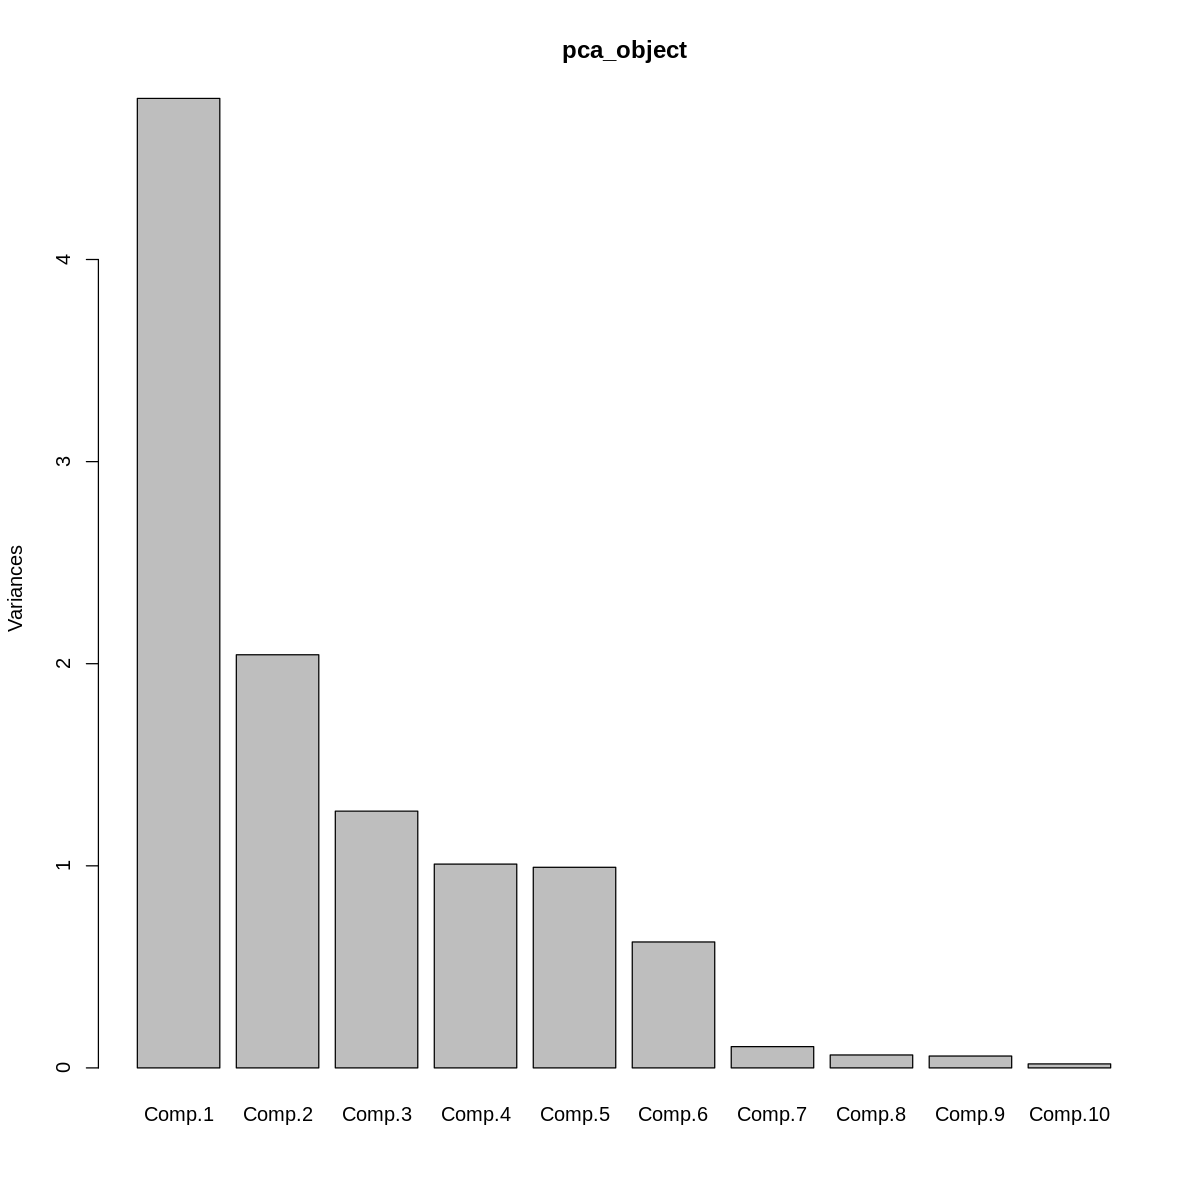

In [85]:
## Plot

plot(pca_object)

In [86]:
## Combine PCA transformed train data with categorical and target attributes

train_data_pca_6comp = data.frame(train_data_pca_transformed[,1:6,drop=F],train_data[,target_cat_cols])

head(train_data_pca_6comp)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,A1,A8,A13,A17,A18,A19,A20,A22,Target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1589,1.710249,1.1454996,-1.0092391,-0.8447434,-0.0823724,-0.3643771,0,0,0,1,0,0,1,0,0
14139,-2.465861,-0.5094337,-2.6577270,1.3271347,0.3541205,1.1995401,0,1,0,0,0,1,1,0,1
8787,1.754760,1.5067587,0.1894983,-1.0141716,1.1087926,0.7975261,0,0,0,1,0,0,1,0,0
24204,1.864025,0.9113452,1.4420297,-1.9609200,0.4003745,1.7789075,0,0,0,0,0,0,1,0,0
556,1.236081,-0.7064737,-0.8050101,-0.2062939,-0.8901156,-0.1033578,0,0,0,0,0,0,1,0,0
19730,-0.977508,0.7087349,2.0783540,-1.2688869,0.7705028,-1.5700202,0,3,0,0,0,0,1,0,0


In [87]:
## Combine PCA transformed validation data with categorical and target attributes

validation_data_pca_6comp = data.frame(validation_data_pca_transformed[,1:6,drop=F],validation_data[,target_cat_cols])

head(validation_data_pca_6comp)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,A1,A8,A13,A17,A18,A19,A20,A22,Target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,1.7986137,0.02711328,0.07480219,-1.00335799,-0.9734388,0.2460821,0,0,0,0,0,0,1,0,0
19,1.4405346,-2.03491882,0.83505974,-0.58966554,-1.7022967,-0.3797276,0,1,0,1,0,0,1,0,0
21,-2.9111674,-3.25573404,1.42690407,0.03397665,1.6008732,-0.7993234,0,4,0,0,0,0,1,0,0
22,1.7204926,0.18321096,-0.55801759,-1.42751841,0.9811930,-0.3712673,0,0,0,1,0,0,1,0,0
24,1.7149881,0.13412258,-0.70615063,-1.26130539,0.7294405,-0.5153047,0,0,0,0,0,0,1,0,0
27,-0.5478636,-0.23924368,-0.47819082,-0.06093244,-0.5547221,0.1798103,0,0,0,0,0,0,1,0,0


In [88]:
# Build a linear model on the data with 1 principal component
pca = glm(Target ~ .,data=train_data_pca_6comp, family = binomial)

summary(pca)


Call:
glm(formula = Target ~ ., family = binomial, data = train_data_pca_6comp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7638  -0.5892  -0.1597   0.5203   3.7292  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.80534    0.12785 -14.121  < 2e-16 ***
Comp.1       -0.48090    0.01781 -26.995  < 2e-16 ***
Comp.2       -0.69432    0.01590 -43.658  < 2e-16 ***
Comp.3       -1.48171    0.02875 -51.532  < 2e-16 ***
Comp.4       -0.11555    0.01993  -5.798 6.69e-09 ***
Comp.5       -0.07501    0.01952  -3.842 0.000122 ***
Comp.6       -1.44821    0.03900 -37.131  < 2e-16 ***
A11           0.10061    0.04983   2.019 0.043482 *  
A12           0.04768    0.07701   0.619 0.535869    
A12.5        -0.21178    0.07642  -2.771 0.005585 ** 
A81           1.25207    0.05709  21.933  < 2e-16 ***
A82           1.51977    0.07494  20.281  < 2e-16 ***
A83           1.58491    0.09644  16.434  < 2e-16 ***
A84           1.67603    0.12218  

In [89]:
## Predict and Evaluate
pred_train_pca = predict(pca,newdata=train_data_pca_6comp)
pred_train_pca_fact = as.factor(ifelse(pred_train_pca > 0.3, 1,0))

pred_validation_pca = predict(pca,newdata=validation_data_pca_6comp)
pred_validation_pca_fact = as.factor(ifelse(pred_validation_pca > 0.3, 1,0))

In [90]:
eval_metrics(actual = train_data_pca_6comp$Target, preds = pred_train_pca_fact)
eval_metrics(actual = validation_data_pca_6comp$Target, preds = pred_validation_pca_fact)


Confusion Matrix 
 
     1     0
1 5750  2611
0 1214 14429

Accuracy  : 0.8406516 
TP_rate   : 0.6877168 
FP_rate   : 0.0776066 
TN_rate   : 0.9223934 
Precision : 0.8256749 


Confusion Matrix 
 
     1    0
1 2372 1168
0  512 6236

Accuracy  : 0.836703 
TP_rate   : 0.6700565 
FP_rate   : 0.07587433 
TN_rate   : 0.9241257 
Precision : 0.8224688 



In [92]:
cat('Logistic Reg Confusion Matrix')
eval_metrics(train_data$Target,preds_train_vanilla_0.3)
cat('Ridge Reg Confusion Matrix')
eval_metrics(actual =train_y, preds = pred_train_ridge_fact)
cat('Lasso Reg Confusion Matrix')
eval_metrics(actual =train_y, preds = pred_train_lasso_fact)
cat('elastic_net Confusion matrix:')
eval_metrics(actual = train_y, preds = pred_train_elastic_fact)
cat('Naive Bayes Confusion matrix:')
eval_metrics(actual = train_data$Target, preds = predict(model,train_data))
cat('PCA Confusion_matrix :')
eval_metrics(actual = train_data_pca_6comp$Target, preds = pred_train_pca_fact)

Logistic Reg Confusion Matrix
Confusion Matrix 
 
     1     0
1 7319  1042
0 2963 12680

Accuracy  : 0.8331528 
TP_rate   : 0.8753738 
FP_rate   : 0.1894138 
TN_rate   : 0.8105862 
Precision : 0.7118265 

Ridge Reg Confusion Matrix
Confusion Matrix 
 
     1     0
1 7690   671
0 4253 11390

Accuracy  : 0.7948675 
TP_rate   : 0.9197464 
FP_rate   : 0.2718788 
TN_rate   : 0.7281212 
Precision : 0.6438918 

Lasso Reg Confusion Matrix
Confusion Matrix 
 
     1     0
1 7681   680
0 4213 11430

Accuracy  : 0.796159 
TP_rate   : 0.91867 
FP_rate   : 0.2693217 
TN_rate   : 0.7306783 
Precision : 0.6457878 

elastic_net Confusion matrix:
Confusion Matrix 
 
     1     0
1 7681   680
0 4213 11430

Accuracy  : 0.796159 
TP_rate   : 0.91867 
FP_rate   : 0.2693217 
TN_rate   : 0.7306783 
Precision : 0.6457878 

Naive Bayes Confusion matrix:
Confusion Matrix 
 
     1     0
1 3798  4563
0 5241 10402

Accuracy  : 0.5915681 
TP_rate   : 0.4542519 
FP_rate   : 0.335038 
TN_rate   : 0.664962 
Precisio

### Conclusion:

As per the given data set the *Ridge and Lasso models* have had the best predictions with the accuracy more then >91% of true possitive rate.